In [1]:
cd /content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1

/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1'

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns

In [6]:
# Read input images and assign labels based on folder names
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/"))

SIZE = 128  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = []

['val', 'train', 'test']


In [7]:
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.*")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

Allaple.L
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00d49cf056c761207d477dcb5f71ff6d.png
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00c27e3da51107de1a65bccf1b51d61f.png
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00a0d4f008a1b2f17716ca3d4fef4c92.png
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00c9cb6c5fd2f6fbce59002170660310.png
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00a7ed7619ae9a3a09e8a8c6d7d81cff.png
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00b80f06b3f71f62f6ffb3a49fa77564.png
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00df8daca39231d4afbb9640b0a160a9.png
/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/train/Allaple.L/00c079b3d364b68838f2a8a190ff75ce.png
/content/drive/MyDrive/Colab Notebooks/Malware

In [8]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [9]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Malware-data/MalImg_Seed1/test/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.*")):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(label)

Agent.FYI
Allaple.A
Allaple.L
Adialer.C
Alueron.gen!J


In [10]:
#Convert lists to arrays        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [11]:
#Encode labels from text to integers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels) # fit_transform()

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [12]:
print(train_labels_encoded)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
print(test_labels_encoded)

[1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 0 0 0 0 0 0 4 4 4 4 4 4 4 4
 4 4 4 4 4 4]


In [14]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

Broadcasting - Normalization

In [15]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
Model = Sequential()
Model.add(Conv2D(12, kernel_size=3, strides=(1,3), activation='relu', padding="same",
                 input_shape = (128,128,1)))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(16,3, strides=(1,1), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))

Model.add(Conv2D(32,3, padding="same", activation='relu'))
Model.add(MaxPooling2D())

Model.add(Flatten())
Model.add(Dense(128,activation='relu'))
Model.add(Dense(64,activation='relu'))
Model.add(Dense(5,activation='softmax'))

Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 43, 12)       120       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 21, 12)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 19, 16)        1744      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 9, 16)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 31, 9, 32)         4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 4, 32)       

In [19]:
'''Available optimizers
SGD
RMSprop
Adam
AdamW
Adadelta
Adagrad
Adamax
Adafactor
Nadam
Ftrl'''
#https://keras.io/api/optimizers/

Model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])


In [23]:
history = Model.fit(x_train, y_train_one_hot, epochs=20, validation_data=(x_test,y_test_one_hot))

Epoch 1/20
9/9 [==============================] - 2s 226ms/step - loss: 0.1334 - accuracy: 0.9301 - val_loss: 0.0851 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 2s 165ms/step - loss: 0.0708 - accuracy: 0.9965 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 1s 126ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 1s 120ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 1s 116ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 1s 116ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 1s 119ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 8/20
9/9 [====

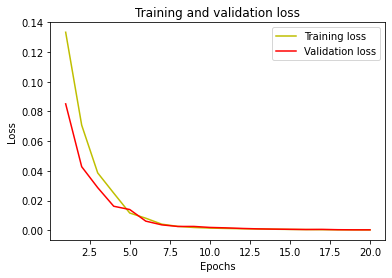

In [24]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)  # range(1,10) --> 1,2,3,4,...,9,10

plt.plot(epochs, loss, 'y', label='Training loss')  # X-axis

plt.plot(epochs, val_loss, 'r', label='Validation loss') # Y-axix

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

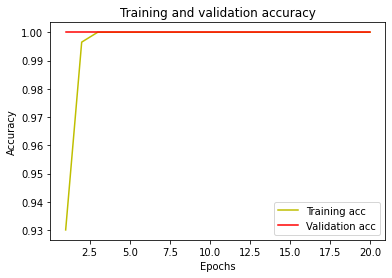

In [25]:
acc = history.history['accuracy'] # Training ACC
val_acc = history.history['val_accuracy'] # Validation ACC
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
prediction_NN = Model.predict(x_test)
print(prediction_NN)

2/2 [==============================] - 0s 39ms/step
[[6.25709706e-10 9.99998271e-01 8.27842825e-08 1.44649107e-06
  1.13965250e-07]
 [2.82903232e-11 9.99996603e-01 1.08372994e-07 3.22476353e-06
  5.25132187e-08]
 [3.49552540e-11 9.99990046e-01 3.19928546e-07 9.36897959e-06
  9.36941689e-08]
 [2.95132530e-11 9.99992192e-01 2.58405521e-07 7.36146058e-06
  9.20958669e-08]
 [9.97958452e-11 9.99996603e-01 9.52169188e-08 3.27435305e-06
  5.76313823e-08]
 [2.47996519e-11 9.99989808e-01 4.48368780e-07 9.57755583e-06
  6.98926286e-08]
 [1.11338350e-09 9.99997675e-01 1.13652277e-07 2.03163086e-06
  1.60106140e-07]
 [5.20007301e-11 9.99983251e-01 5.16764317e-07 1.60235195e-05
  2.02838280e-07]
 [1.53501696e-05 7.85001220e-08 9.99701500e-01 2.42404087e-04
  4.07022853e-05]
 [2.22354611e-05 5.26943005e-08 9.99729276e-01 1.76478265e-04
  7.19817035e-05]
 [6.15465542e-05 1.89017186e-07 9.98947918e-01 8.45839269e-04
  1.44541278e-04]
 [5.05436983e-05 4.73767159e-08 9.99601662e-01 2.52666912e-04
  9.50

In [27]:
#number into label
prediction_NN=np.argmax(prediction_NN,axis=-1)
print(prediction_NN)

[1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 0 0 0 0 0 0 4 4 4 4 4 4 4 4
 4 4 4 4 4 4]


In [28]:
#apply label encode object 
prediction_NN = le.inverse_transform(prediction_NN)
print(prediction_NN)

['Agent.FYI' 'Agent.FYI' 'Agent.FYI' 'Agent.FYI' 'Agent.FYI' 'Agent.FYI'
 'Agent.FYI' 'Agent.FYI' 'Allaple.A' 'Allaple.A' 'Allaple.A' 'Allaple.A'
 'Allaple.A' 'Allaple.A' 'Allaple.A' 'Allaple.A' 'Allaple.L' 'Allaple.L'
 'Allaple.L' 'Allaple.L' 'Allaple.L' 'Allaple.L' 'Allaple.L' 'Adialer.C'
 'Adialer.C' 'Adialer.C' 'Adialer.C' 'Adialer.C' 'Adialer.C'
 'Alueron.gen!J' 'Alueron.gen!J' 'Alueron.gen!J' 'Alueron.gen!J'
 'Alueron.gen!J' 'Alueron.gen!J' 'Alueron.gen!J' 'Alueron.gen!J'
 'Alueron.gen!J' 'Alueron.gen!J' 'Alueron.gen!J' 'Alueron.gen!J'
 'Alueron.gen!J' 'Alueron.gen!J']


In [29]:
xlab = ['Adialer.C','Agent.FYI','Allaple.A','Allaple.L','Alueron.gen!J']

[[ 6  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 14]]


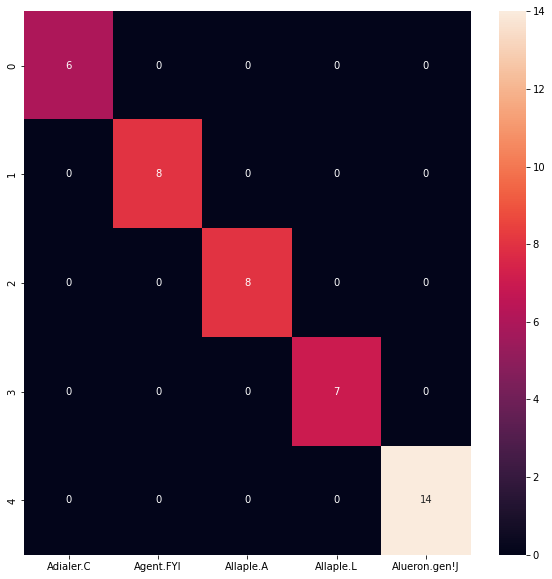

In [31]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))

test_labels = le.inverse_transform(y_test)

# print(test_labels)
# print(prediction_NN)

cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm,annot=True,xticklabels = xlab)